# Carregando os dados

In [56]:
import pandas as pd
import numpy as np
import folium
import geopandas as gpd
import matplotlib.pyplot as plt


df_orders = pd.read_excel("superstore.xls", sheet_name="Pedidos")
df_devolutions = pd.read_excel("superstore.xls", sheet_name="Devoluções")
df_people = pd.read_excel("superstore.xls", sheet_name="Pessoas")

df_superstore = pd.merge(
    df_orders, df_devolutions, on="ID do pedido", how="left")

# Visualização dos dados

In [39]:
df_superstore

,ID da fila,ID do pedido,Data do pedido,Data de envio,Modo de envio,ID do cliente,Nome do cliente,Segmento,Cidade,Estado,...,Região,ID do produto,Categoria,Sub-categoria,Nome do produto,Vendas,Quantidade,Desconto,Lucro,Devolvido
0,1,MX-2024-143658,2024-10-02,2024-10-06,Classe padrão,SR-20575,Sofia Rocha,Varejo,Cidade do México,Distrito Federal,...,Norte,MAT-ET-10001014,Material de escritório,Etiquetas,"HON Etiquetas para organização de pastas, Ajus...",130.80,3,0.0,45.60,NaN
1,2,MX-2022-155047,2022-10-16,2022-10-21,Classe padrão,LC-16570,Larissa Cardoso,Varejo,Dos Quebradas,Risaralda,...,Sul,MÓV-MÓ-10004592,Móveis,Móveis,"Tenex Relógio de parede, Durável",2521.60,8,0.0,907.20,NaN
2,3,MX-2022-155047,2022-10-16,2022-10-21,Classe padrão,LC-16570,Larissa Cardoso,Varejo,Dos Quebradas,Risaralda,...,Sul,MÓV-ES-10000849,Móveis,Estantes,"Ikea Gaveteiro, Branco",1932.80,2,0.0,540.80,NaN
3,4,MX-2022-155047,2022-10-16,2022-10-21,Classe padrão,LC-16570,Larissa Cardoso,Varejo,Dos Quebradas,Risaralda,...,Sul,MAT-FI-10003284,Material de escritório,Fichários,"Cardinal Pasta argolada, Transparente",354.40,4,0.0,49.60,NaN
4,5,MX-2022-155047,2022-10-16,2022-10-21,Classe padrão,LC-16570,Larissa Cardoso,Varejo,Dos Quebradas,Risaralda,...,Sul,MAT-AR-10002762,Material de escritório,Arte,"Sanford Tela, Tamanhos variados",716.00,2,0.0,114.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,10283,US-2022-145282,2022-04-05,2022-04-08,Primeira classe,LM-17230,Letícia Martins,Varejo,Ponte Nova,Minas Gerais,...,Sul,MAT-ET-10003909,Material de escritório,Etiquetas,"HON Etiquetas de envio, Ajustável",74.16,3,0.6,-81.84,NaN
12646,10284,US-2022-145282,2022-04-05,2022-04-08,Primeira classe,LM-17230,Letícia Martins,Varejo,Ponte Nova,Minas Gerais,...,Sul,MAT-EN-10001954,Material de escritório,Envelopes,"Jiffy Fita dupla face, Vermelho",62.80,1,0.6,-64.40,NaN
12647,10285,US-2022-106523,2022-02-11,2022-02-15,Classe padrão,RA-19795,Raissa Azevedo,Pequenas e Medias Empresas,São Miguel dos Campos,Alagoas,...,Sul,MÓV-CA-10004481,Móveis,Cadeiras,"Harbour Creations Cadeira de praia, Vermelho",492.96,3,0.6,-407.04,NaN
12648,10286,US-2023-168032,2023-11-05,2023-11-09,Classe padrão,BC-11380,Brenda Cardoso,Grande Empresa,Vassouras,Rio de Janeiro,...,Sul,MÓV-ES-10003288,Móveis,Estantes,"Ikea Par, Preto",663.52,2,0.6,-199.28,NaN


# Criar coluna de tempo de envio

In [40]:
df_superstore["Tempo para envio"] = df_superstore["Data de envio"] - \
    df_superstore["Data do pedido"]

# Remover colunas desnecessárias

In [41]:
df_superstore = df_superstore.drop(
    columns=["Nome do cliente", "ID do cliente", "ID do pedido", "ID da fila"]
)

# Corrigir coluna Devolvido

In [42]:
df_superstore["Devolvido"] = df_superstore["Devolvido"].replace(np.nan, "Não")

## Proporção de produtos devolvidos

In [43]:
df_superstore["Devolvido"].value_counts(normalize=True)

Devolvido
Não    0.746403
Sim    0.253597
Name: proportion, dtype: float64

In [44]:
df_superstore

,Data do pedido,Data de envio,Modo de envio,Segmento,Cidade,Estado,País/Região,Região,ID do produto,Categoria,Sub-categoria,Nome do produto,Vendas,Quantidade,Desconto,Lucro,Devolvido,Tempo para envio
0,2024-10-02,2024-10-06,Classe padrão,Varejo,Cidade do México,Distrito Federal,México,Norte,MAT-ET-10001014,Material de escritório,Etiquetas,"HON Etiquetas para organização de pastas, Ajus...",130.80,3,0.0,45.60,Não,4 days
1,2022-10-16,2022-10-21,Classe padrão,Varejo,Dos Quebradas,Risaralda,Colômbia,Sul,MÓV-MÓ-10004592,Móveis,Móveis,"Tenex Relógio de parede, Durável",2521.60,8,0.0,907.20,Não,5 days
2,2022-10-16,2022-10-21,Classe padrão,Varejo,Dos Quebradas,Risaralda,Colômbia,Sul,MÓV-ES-10000849,Móveis,Estantes,"Ikea Gaveteiro, Branco",1932.80,2,0.0,540.80,Não,5 days
3,2022-10-16,2022-10-21,Classe padrão,Varejo,Dos Quebradas,Risaralda,Colômbia,Sul,MAT-FI-10003284,Material de escritório,Fichários,"Cardinal Pasta argolada, Transparente",354.40,4,0.0,49.60,Não,5 days
4,2022-10-16,2022-10-21,Classe padrão,Varejo,Dos Quebradas,Risaralda,Colômbia,Sul,MAT-AR-10002762,Material de escritório,Arte,"Sanford Tela, Tamanhos variados",716.00,2,0.0,114.40,Não,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,2022-04-05,2022-04-08,Primeira classe,Varejo,Ponte Nova,Minas Gerais,Brasil,Sul,MAT-ET-10003909,Material de escritório,Etiquetas,"HON Etiquetas de envio, Ajustável",74.16,3,0.6,-81.84,Não,3 days
12646,2022-04-05,2022-04-08,Primeira classe,Varejo,Ponte Nova,Minas Gerais,Brasil,Sul,MAT-EN-10001954,Material de escritório,Envelopes,"Jiffy Fita dupla face, Vermelho",62.80,1,0.6,-64.40,Não,3 days
12647,2022-02-11,2022-02-15,Classe padrão,Pequenas e Medias Empresas,São Miguel dos Campos,Alagoas,Brasil,Sul,MÓV-CA-10004481,Móveis,Cadeiras,"Harbour Creations Cadeira de praia, Vermelho",492.96,3,0.6,-407.04,Não,4 days
12648,2023-11-05,2023-11-09,Classe padrão,Grande Empresa,Vassouras,Rio de Janeiro,Brasil,Sul,MÓV-ES-10003288,Móveis,Estantes,"Ikea Par, Preto",663.52,2,0.6,-199.28,Não,4 days


# Avaliando produtos Devolvidos

In [45]:
df_superstore_devolvidos = df_superstore[df_superstore["Devolvido"] == "Sim"]

In [46]:
df_superstore_devolvidos.head()

,Data do pedido,Data de envio,Modo de envio,Segmento,Cidade,Estado,País/Região,Região,ID do produto,Categoria,Sub-categoria,Nome do produto,Vendas,Quantidade,Desconto,Lucro,Devolvido,Tempo para envio
14,2024-10-18,2024-10-23,Classe padrão,Varejo,Brasília,Distrito Federal,Brasil,Sul,MAT-AR-10002737,Material de escritório,Arte,"Stanley Tela, Embalagem tipo bulk",1326.4000,4,0.000,357.6000,Sim,5 days
15,2024-10-18,2024-10-23,Classe padrão,Varejo,Brasília,Distrito Federal,Brasil,Sul,MAT-AR-10002737,Material de escritório,Arte,"Stanley Tela, Embalagem tipo bulk",1326.4000,4,0.000,357.6000,Sim,5 days
16,2024-10-18,2024-10-23,Classe padrão,Varejo,Brasília,Distrito Federal,Brasil,Sul,MAT-CO-10002418,Material de escritório,Colchetes,"Advantus Prendedores de papel, Metal",129.4000,1,0.000,10.2000,Sim,5 days
17,2024-10-18,2024-10-23,Classe padrão,Varejo,Brasília,Distrito Federal,Brasil,Sul,MAT-CO-10002418,Material de escritório,Colchetes,"Advantus Prendedores de papel, Metal",129.4000,1,0.000,10.2000,Sim,5 days
27,2024-06-18,2024-06-25,Classe padrão,Grande Empresa,Milpa Alta,Distrito Federal,México,Norte,TEC-CO-10004677,Tecnologia,Copiadoras,"HP Copiadora, Colorida",3261.8632,2,0.002,647.0632,Sim,7 days


## Visão no mapa da proporção de produtos devolvidos

In [47]:
superstore_devolvidos_country = df_superstore_devolvidos.groupby(
    "País/Região").size().reset_index(name="count")

In [48]:
superstore_devolvidos_country.sort_values(by="count", ascending=False)

,País/Região,count
10,México,1794
2,Brasil,305
6,El Salvador,224
9,Honduras,134
4,Colômbia,132
13,Peru,122
5,Cuba,109
14,República Dominicana,102
0,Argentina,93
7,Guatemala,81


In [49]:
from geopy.geocoders import Nominatim

def get_coordinates(country_name):
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.geocode(country_name)
    if location:
        return (location.latitude, location.longitude)
    else:
        return None

# Example usage
coords = get_coordinates('Canada')
print(coords)


(61.0666922, -107.991707)


In [50]:
superstore_devolvidos_country["Coordinates"] = superstore_devolvidos_country["País/Região"].apply(
    get_coordinates)

m = folium.Map(location=[0, -40], zoom_start=4)

# Add markers with size proportional to count
for idx, row in superstore_devolvidos_country.iterrows():
    # Find the latitude and longitude of the country centroid (you might need a more accurate source)
    lat, lon = row['Coordinates'][0], row['Coordinates'][1]
    folium.CircleMarker(
        location=[lat, lon],
        radius=row['count'] / 50, # Adjust size scaling as needed
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)
m

GeocoderInsufficientPrivileges: Non-successful status code 403

## Proporção de produtos devolvidos por categoria

<Axes: ylabel='Categoria'>

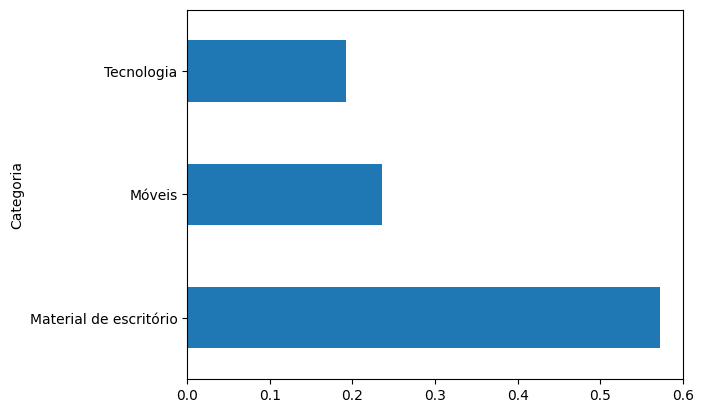

In [53]:
df_superstore_devolvidos["Categoria"].value_counts(normalize=True, ascending=False).plot(kind="barh")

## Proporção de produtos devolvidos por sub-categoria

<Axes: ylabel='Sub-categoria'>

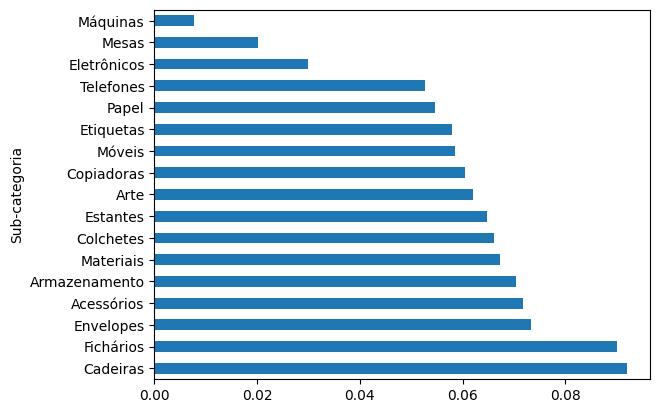

In [54]:
df_superstore_devolvidos["Sub-categoria"].value_counts(normalize=True, ascending=False).plot(kind="barh")

## Proporção de produtos devolvidos por nome do produto

<Axes: ylabel='Nome do produto'>

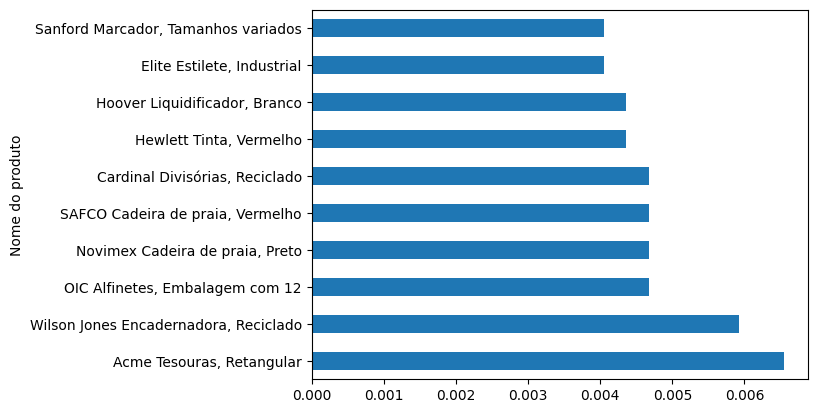

In [55]:
df_superstore_devolvidos["Nome do produto"].value_counts(normalize=True,
                                                         ascending=False).head(10).plot(kind="barh")

## Avaliando produtos Devolvidos por País/Região

Text(0.5, 0, 'Quantidade de devoluções')

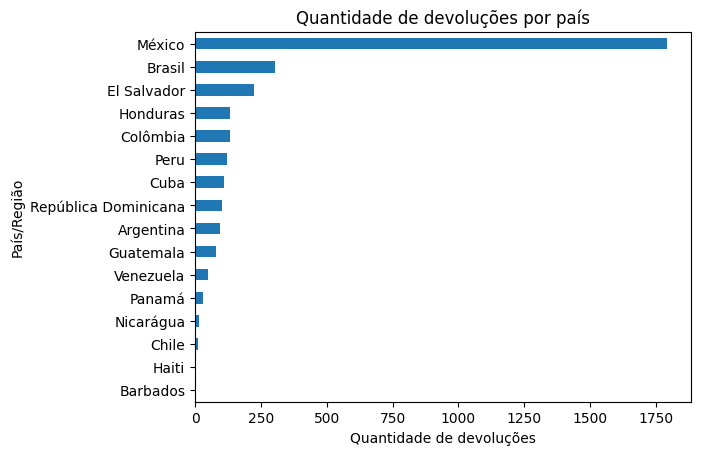

In [79]:
df_superstore_devolvidos["País/Região"].value_counts(normalize=False, ascending=True).plot(kind="barh")
# Add title and labels
plt.title("Quantidade de devoluções por país")
plt.xlabel("Quantidade de devoluções")

### Avaliando produtos devolvidos no México, com maior incidência

In [51]:
df_superstore_devolvidos_mx = df_superstore_devolvidos[
    df_superstore_devolvidos["País/Região"] == "México"]
df_superstore_devolvidos_mx

,Data do pedido,Data de envio,Modo de envio,Segmento,Cidade,Estado,País/Região,Região,ID do produto,Categoria,Sub-categoria,Nome do produto,Vendas,Quantidade,Desconto,Lucro,Devolvido,Tempo para envio
27,2024-06-18,2024-06-25,Classe padrão,Grande Empresa,Milpa Alta,Distrito Federal,México,Norte,TEC-CO-10004677,Tecnologia,Copiadoras,"HP Copiadora, Colorida",3261.8632,2,0.002,647.0632,Sim,7 days
28,2024-06-18,2024-06-25,Classe padrão,Grande Empresa,Milpa Alta,Distrito Federal,México,Norte,TEC-CO-10004677,Tecnologia,Copiadoras,"HP Copiadora, Colorida",3261.8632,2,0.002,647.0632,Sim,7 days
29,2024-06-18,2024-06-25,Classe padrão,Grande Empresa,Cidade do México,Distrito Federal,México,Norte,MAT-AR-10000951,Material de escritório,Armazenamento,"Rogers Caixa, Tamanho real",800.0000,5,0.000,344.0000,Sim,7 days
30,2024-06-18,2024-06-25,Classe padrão,Grande Empresa,Cidade do México,Distrito Federal,México,Norte,MAT-AR-10000951,Material de escritório,Armazenamento,"Rogers Caixa, Tamanho real",800.0000,5,0.000,344.0000,Sim,7 days
88,2024-10-29,2024-11-02,Classe padrão,Varejo,San Juan del Río,Querétaro,México,Norte,TEC-MÁ-10000856,Tecnologia,Máquinas,"Panasonic Inkjet, Branco",4140.0000,2,0.000,455.2000,Sim,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12131,2022-05-30,2022-06-03,Classe padrão,Grande Empresa,Milpa Alta,Distrito Federal,México,Norte,MAT-AR-10004926,Material de escritório,Armazenamento,"Tenex Pratelheiras, Tamanho real",3281.4000,9,0.000,851.4000,Sim,4 days
12132,2022-05-30,2022-06-03,Classe padrão,Grande Empresa,Milpa Alta,Distrito Federal,México,Norte,MAT-AR-10004926,Material de escritório,Armazenamento,"Tenex Pratelheiras, Tamanho real",3281.4000,9,0.000,851.4000,Sim,4 days
12133,2022-05-30,2022-06-03,Classe padrão,Grande Empresa,Milpa Alta,Distrito Federal,México,Norte,MAT-AR-10004926,Material de escritório,Armazenamento,"Tenex Pratelheiras, Tamanho real",3281.4000,9,0.000,851.4000,Sim,4 days
12202,2023-08-17,2023-08-22,Classe padrão,Varejo,Colima,Colima,México,Norte,MAT-MA-10001359,Material de escritório,Materiais,"Elite Cortador de papel, Retangular",511.6000,2,0.000,189.2000,Sim,5 days


Text(0.5, 0, 'Quantidade de produtos')

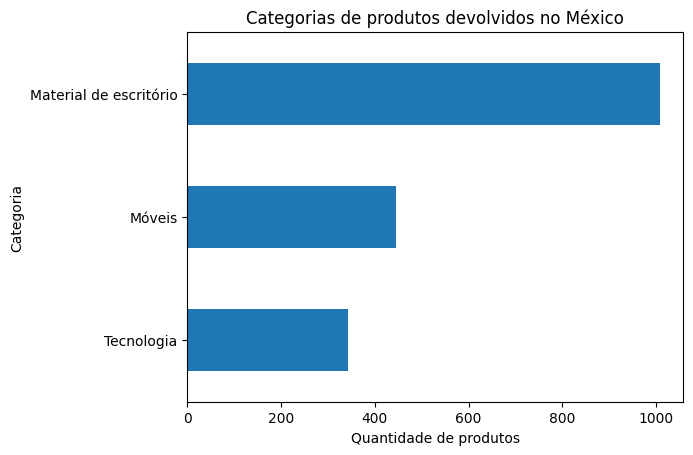

In [57]:
df_superstore_devolvidos_mx["Categoria"].value_counts(normalize=False, ascending=True).plot(kind="barh")
# Add title and labels
plt.title('Categorias de produtos devolvidos no México')
plt.xlabel('Quantidade de produtos')

In [58]:
df_superstore_devolvidos_mx["Categoria"].value_counts(normalize=False, ascending=False)

Categoria
Material de escritório    1007
Móveis                     445
Tecnologia                 342
Name: count, dtype: int64

Text(0.5, 0, 'Quantidade de produtos')

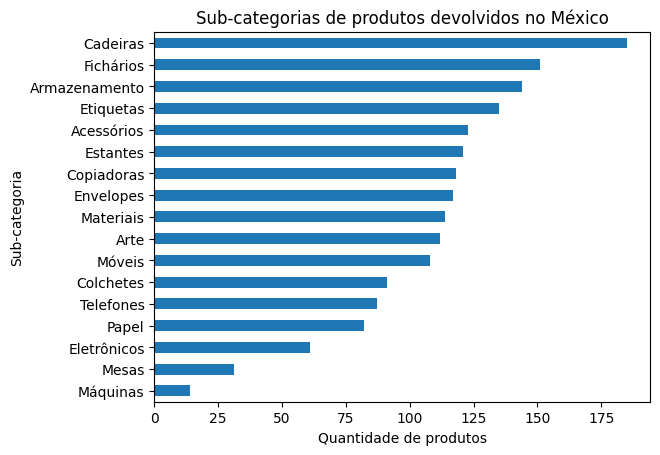

In [60]:
df_superstore_devolvidos_mx["Sub-categoria"].value_counts(normalize=False, ascending=True).plot(kind="barh")
# Add title and labels
plt.title('Sub-categorias de produtos devolvidos no México')
plt.xlabel('Quantidade de produtos')

In [61]:
df_superstore_devolvidos_mx["Sub-categoria"].value_counts(normalize=False, ascending=False)

Sub-categoria
Cadeiras         185
Fichários        151
Armazenamento    144
Etiquetas        135
Acessórios       123
Estantes         121
Copiadoras       118
Envelopes        117
Materiais        114
Arte             112
Móveis           108
Colchetes         91
Telefones         87
Papel             82
Eletrônicos       61
Mesas             31
Máquinas          14
Name: count, dtype: int64

<Axes: ylabel='Nome do produto'>

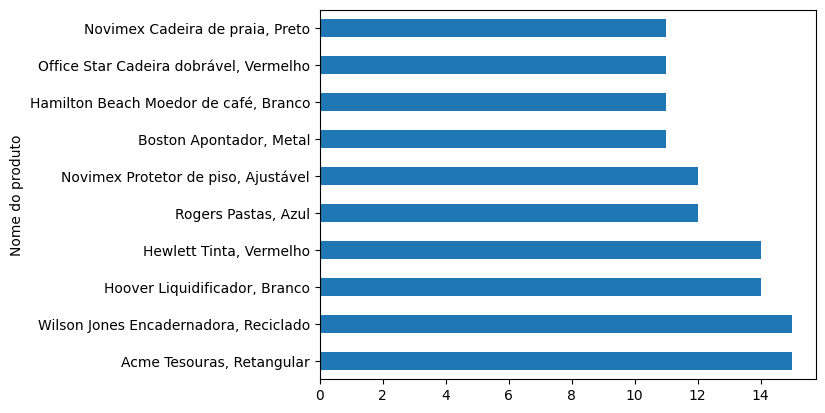

In [64]:
df_superstore_devolvidos_mx["Nome do produto"].value_counts(normalize=False,
                                                            ascending=False).head(10).plot(kind="barh")

## Avaliando produtos Devolvidos por Cidade

Text(0.5, 0, 'Quantidade de produtos')

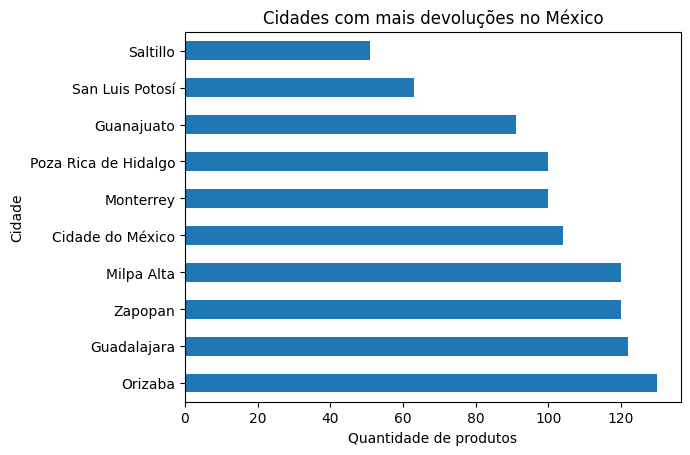

In [76]:
df_superstore_devolvidos_mx["Cidade"].value_counts(normalize=False, ascending=False).head(10).plot(kind="barh")
# Add title and labels
plt.title('Cidades com mais devoluções no México')
plt.xlabel('Quantidade de produtos')

In [78]:
df_superstore_devolvidos_mx["Cidade"].value_counts(normalize=False, ascending=False).head(10)

Cidade
Orizaba                 130
Guadalajara             122
Zapopan                 120
Milpa Alta              120
Cidade do México        104
Monterrey               100
Poza Rica de Hidalgo    100
Guanajuato               91
San Luis Potosí          63
Saltillo                 51
Name: count, dtype: int64